In [8]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs

from sklearn.preprocessing import MinMaxScaler



In [9]:
model = MinMaxScaler(feature_range=(0, 1))

In [10]:
data = np.load("../datasets/mnist/mnist_train_small.npy")

X, y = data[:, 1:], data[:, 0]

In [11]:
X_mod = model.fit_transform(X)

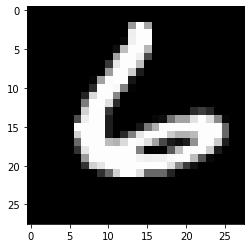

In [12]:
plt.imshow(X_mod[100].reshape(28, 28), cmap="gray")

In [13]:
X_mod.max()

1.0

In [14]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [16]:
encoder = Sequential()
encoder.add(Dense(units=100, activation="relu", input_shape=(784,)))
encoder.add(Dense(units=30, activation="relu"))

decoder = Sequential()
decoder.add(Dense(units=100, activation="relu", input_shape=(30,)))
decoder.add(Dense(units=784, activation="relu"))


In [17]:
model = Sequential()
model.add(Input(shape=(784,)))
model.add(encoder)
model.add(decoder)

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_2 (Sequential)    (None, 30)                81530     
_________________________________________________________________
sequential_3 (Sequential)    (None, 784)               82284     
Total params: 163,814
Trainable params: 163,814
Non-trainable params: 0
_________________________________________________________________


In [19]:
model.compile(optimiser="adam", loss="mse")

In [20]:
model.fit(X_mod, X_mod, batch_size=200, epochs=20)

Train on 19999 samples
Epoch 1/20
19999/19999 [==============================] - 3s 159us/sample - loss: 0.0516
Epoch 2/20
19999/19999 [==============================] - 2s 87us/sample - loss: 0.0356
Epoch 3/20
19999/19999 [==============================] - 2s 88us/sample - loss: 0.0305
Epoch 4/20
19999/19999 [==============================] - 2s 88us/sample - loss: 0.0276
Epoch 5/20
19999/19999 [==============================] - 2s 89us/sample - loss: 0.0259
Epoch 6/20
19999/19999 [==============================] - 2s 89us/sample - loss: 0.0247
Epoch 7/20
19999/19999 [==============================] - 2s 100us/sample - loss: 0.0237
Epoch 8/20
19999/19999 [==============================] - 2s 115us/sample - loss: 0.0229
Epoch 9/20
19999/19999 [==============================] - 2s 84us/sample - loss: 0.0220
Epoch 10/20
19999/19999 [==============================] - 2s 85us/sample - loss: 0.0213
Epoch 11/20
19999/19999 [==============================] - 2s 89us/sample - loss: 0.0207
Epoc

In [21]:
gen = model.predict(X_mod[:10])

In [22]:
gen.shape

(10, 784)

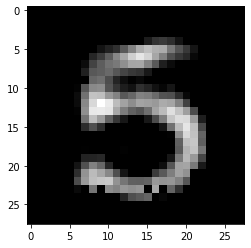

In [23]:
plt.imshow(gen[3].reshape(28, 28), cmap="gray")

In [26]:
X_encoded = encoder.predict(X_mod[:500])

In [27]:
X_encoded.shape

(500, 30)

In [29]:
X_decoded = decoder.predict(X_encoded)

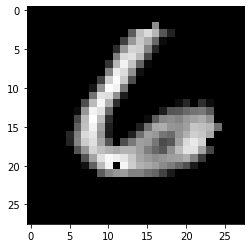

In [32]:
plt.imshow(X_decoded[100].reshape(28, 28), cmap="gray")